# ceneo analyzer


## loading libraries


In [22]:
import os 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Listing codes for all products for which opinions have been extracted


In [17]:
if os.path.exists("opinions"):
    print(*[filename.split(".")[0] for filename in os.listdir("opinions")], sep="\n")

80905320


# Specyfying about which products opinioons should be analyzed


In [18]:
#80905320
product_id = input("Please provide ceneo.pl product code")

## importing opinions from json file to pandas.Data Frames object

In [19]:
opinions =pd.read_json(f"opinions/{product_id}.json")
MAX_SCORE= 5
opinions.score=opinions.score.apply(lambda s: round(s*MAX_SCORE,1))

In [6]:
opinions

,opinion_id,author,recommendation,score,content,pros,cons,helpful,unhelpful,publish_date,purchase_date
0,13325736,b...z,1.0,1.0,"Produkt super , jest przydaczny , nadmuchane b...","[jakość, trwałość, wygląd]",[],0,3,2020-11-04 23:26:48,2020-10-17 17:15:04
1,14007737,Użytkownik Ceneo,1.0,1.0,"Udalo sie jedma puszks nadmuchać 2 balony 12""...",[],"[jakość, trwałość, wygląd]",1,0,2021-02-24 08:14:36,2021-01-29 14:50:47
2,12318795,Użytkownik Ceneo,1.0,0.8,Mało helu,[],[],6,0,2020-05-02 20:30:53,2020-04-01 22:56:49
3,14941585,Maciej,1.0,1.0,Mnóstwo zabawy która niestety szybko się kończy,"[jakość, wygląd]",[trwałość],0,0,2021-09-09 23:41:17,2021-08-23 16:01:14
4,14453496,p...x,1.0,0.8,Wystarczy tylko Na 3 balony. Ogólnie ok.,[],[],0,0,2021-05-13 20:29:20,2021-05-02 17:23:52
5,11274395,Mykhailo Zvir,0.0,0.2,"Nie polecam, nie ma helu. Święta nie będzie",[jakość],"[trwałość, wygląd]",8,0,2019-11-14 14:14:59,2019-11-04 19:53:49
6,17712636,n...1,0.0,0.1,"Od 03,06,2023 do dzisiaj nie otrzymałam zamówi...",[],[],0,0,2023-07-17 09:08:27,2023-06-15 15:07:28
7,12621947,u...m,0.0,0.2,"Okropny zakup ... nie polecam, gdybym wiedzial...",[wygląd],"[jakość, trwałość]",8,0,2020-06-10 08:32:01,2020-05-14 13:30:43
8,11566725,Użytkownik Ceneo,0.0,0.2,Trzema puszkami napełniłam 3 balony. Beznadzie...,[],"[jakość, trwałość, wygląd]",7,0,2020-01-11 16:01:10,None
9,14537088,d...2,0.0,0.3,Butla wystarczyła na napompowanie 1 +1/2 balon...,[wygląd],"[jakość, trwałość]",2,0,2021-05-31 09:20:15,2021-05-14 19:51:36


## basic statistics

In [20]:

opinions_count = len(opinions)
pros_count= opinions.pros.apply(lambda p: None if not p else p).count()
cons_count= opinions.cons.apply(lambda c: None if not c else c).count()
average_score = opinions.score.mean()

# Basic charts

## score histogram

[Text(0, 0, ''),
 Text(0, 0, '11'),
 Text(0, 0, '9'),
 Text(0, 0, '5'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, ''),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '14')]

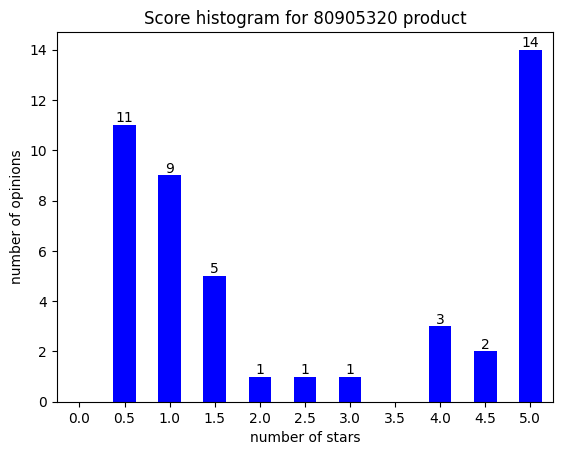

In [26]:
score_distribution = opinions.score.value_counts().reindex(np.arange(0,5.5,0.5))
fog, ax =plt.subplots()
score_distribution.plot.bar(color = "blue")
plt.xlabel("number of stars")
plt.ylabel("number of opinions")
plt.xticks(rotation= 0)
plt.title(f"Score histogram for {product_id} product")
ax.bar_label(ax.containers[0],label_type="edge", fmt = lambda l: int(l) if l else"")


### Recommedations shares

Text(0.5, 1.0, 'recommendations shares  for 80905320 product')

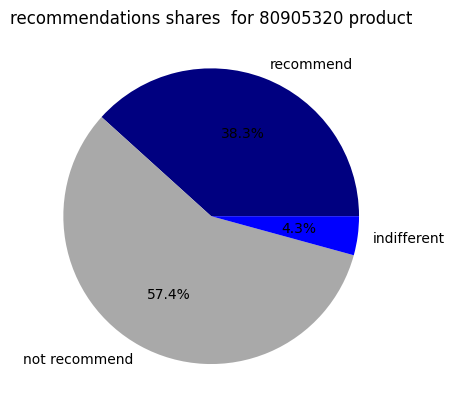

In [49]:
recommendation_distributions = opinions.recommendation.value_counts(dropna = False).reindex([True, False, np. nan], fill_value = 0)
recommendation_distributions.plot.pie(
    labels = ["recommend", "not recommend", "indifferent"],
    label = "",
    colors = ["navy", "darkgrey", "b"],
    autopct = lambda l: "{:1.1f}%".format(l) if l else ""
)
plt.title(f"recommendations shares  for {product_id} product")